In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

In [3]:
print(f"Shape: {train_df.shape}")
print(f"Duplicados: {train_df.duplicated().sum()}")
print("\nNulos por coluna:")
print(train_df.isnull().sum())
print("\nTipos das colunas:")
print(train_df.dtypes)
print("\nValores únicos por coluna:")
print(train_df.nunique())
print("\nPrimeiras linhas do dataset:")
print(train_df.head())

Shape: (243787, 21)
Duplicados: 0

Nulos por coluna:
AccountAge                  0
MonthlyCharges              0
TotalCharges                0
SubscriptionType            0
PaymentMethod               0
PaperlessBilling            0
ContentType                 0
MultiDeviceAccess           0
DeviceRegistered            0
ViewingHoursPerWeek         0
AverageViewingDuration      0
ContentDownloadsPerMonth    0
GenrePreference             0
UserRating                  0
SupportTicketsPerMonth      0
Gender                      0
WatchlistSize               0
ParentalControl             0
SubtitlesEnabled            0
CustomerID                  0
Churn                       0
dtype: int64

Tipos das colunas:
AccountAge                    int64
MonthlyCharges              float64
TotalCharges                float64
SubscriptionType             object
PaymentMethod                object
PaperlessBilling             object
ContentType                  object
MultiDeviceAccess            obj

In [4]:
print("\nProporção de Churn (target):")
print(train_df['Churn'].value_counts(normalize=True))


Proporção de Churn (target):
Churn
0    0.818768
1    0.181232
Name: proportion, dtype: float64


In [5]:
print("\nResumo estatístico das numéricas:")
print(train_df.describe().T)


Resumo estatístico das numéricas:
                             count        mean         std       min  \
AccountAge                243787.0   60.083758   34.285143  1.000000   
MonthlyCharges            243787.0   12.490695    4.327615  4.990062   
TotalCharges              243787.0  750.741017  523.073273  4.991154   
ViewingHoursPerWeek       243787.0   20.502179   11.243753  1.000065   
AverageViewingDuration    243787.0   92.264061   50.505243  5.000547   
ContentDownloadsPerMonth  243787.0   24.503513   14.421174  0.000000   
UserRating                243787.0    3.002713    1.155259  1.000007   
SupportTicketsPerMonth    243787.0    4.504186    2.872548  0.000000   
WatchlistSize             243787.0   12.018508    7.193034  0.000000   
Churn                     243787.0    0.181232    0.385211  0.000000   

                                 25%         50%          75%          max  
AccountAge                 30.000000   60.000000    90.000000   119.000000  
MonthlyCharges    

In [6]:
cat_cols = train_df.select_dtypes(include='object').columns.drop(['CustomerID'])
for col in cat_cols:
    print(f"\n==== {col} ====")
    print(train_df[col].value_counts())


==== SubscriptionType ====
SubscriptionType
Standard    81920
Basic       81050
Premium     80817
Name: count, dtype: int64

==== PaymentMethod ====
PaymentMethod
Electronic check    61313
Credit card         60924
Bank transfer       60797
Mailed check        60753
Name: count, dtype: int64

==== PaperlessBilling ====
PaperlessBilling
No     121980
Yes    121807
Name: count, dtype: int64

==== ContentType ====
ContentType
Both        81737
TV Shows    81145
Movies      80905
Name: count, dtype: int64

==== MultiDeviceAccess ====
MultiDeviceAccess
No     122035
Yes    121752
Name: count, dtype: int64

==== DeviceRegistered ====
DeviceRegistered
Computer    61147
Tablet      61143
Mobile      60914
TV          60583
Name: count, dtype: int64

==== GenrePreference ====
GenrePreference
Comedy     49060
Fantasy    48955
Drama      48744
Action     48690
Sci-Fi     48338
Name: count, dtype: int64

==== Gender ====
Gender
Female    121930
Male      121857
Name: count, dtype: int64

==== Par

In [7]:
corrs = train_df.select_dtypes(include='number').corr()['Churn'].sort_values(key=abs, ascending=False)
print("\nFeatures numéricas mais correlacionadas com Churn:")
print(corrs.head(10))


Features numéricas mais correlacionadas com Churn:
Churn                       1.000000
AccountAge                 -0.197736
AverageViewingDuration     -0.146897
ContentDownloadsPerMonth   -0.129752
ViewingHoursPerWeek        -0.128645
TotalCharges               -0.120529
MonthlyCharges              0.100473
SupportTicketsPerMonth      0.084064
UserRating                  0.022124
WatchlistSize               0.021739
Name: Churn, dtype: float64


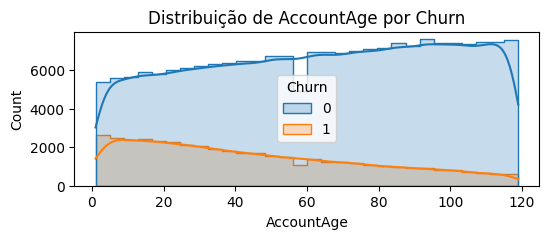

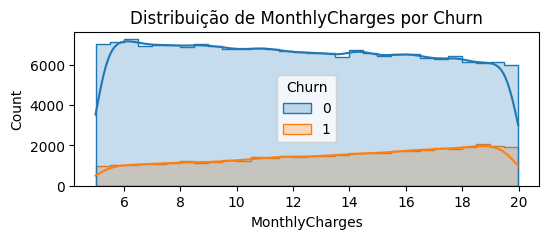

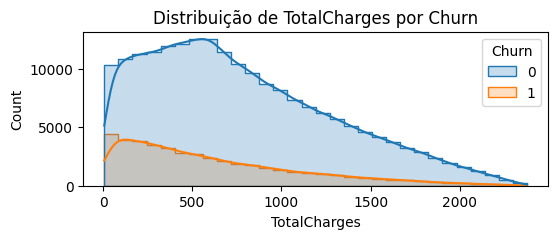

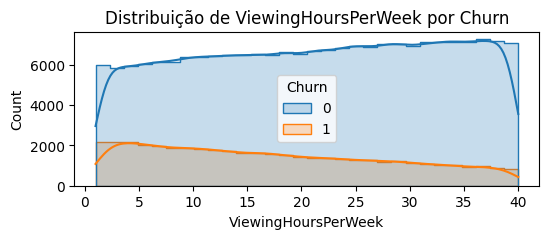

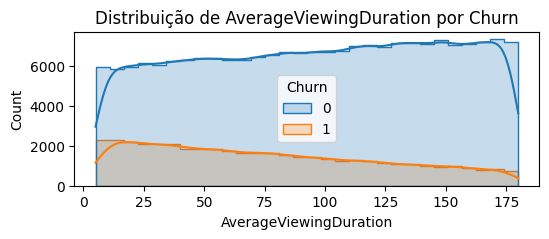

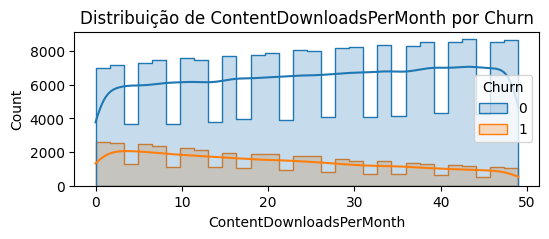

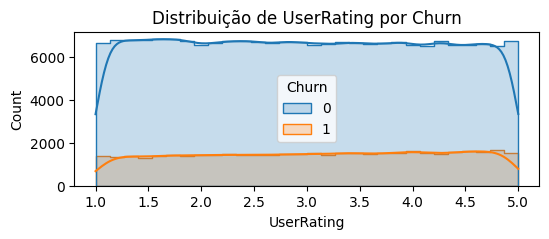

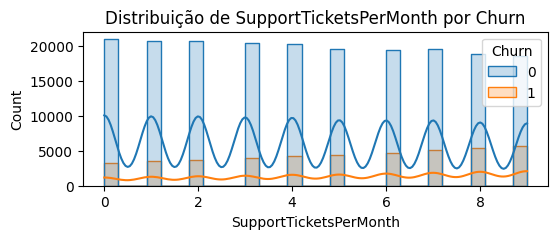

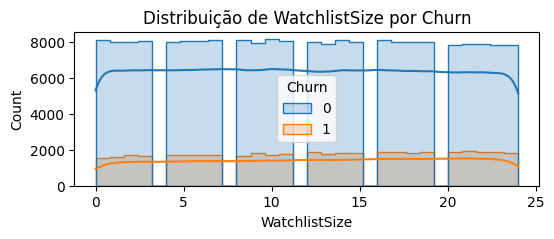

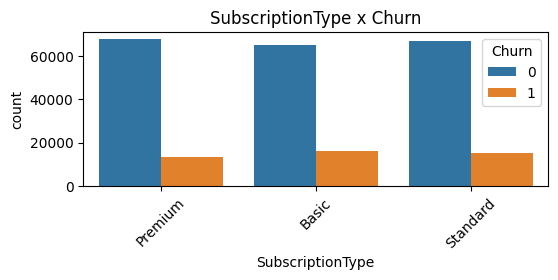

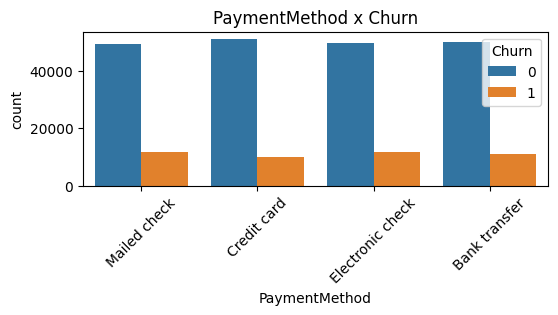

In [ ]:
# Histogramas de numéricas
num_cols = train_df.select_dtypes(include=['int64','float64']).columns.drop(['Churn'])
for col in num_cols:
    plt.figure(figsize=(6,2))
    sns.histplot(data=train_df, x=col, hue='Churn', bins=30, kde=True, element='step')
    plt.title(f'Distribuição de {col} por Churn')
    plt.show()

# Countplots de categóricas
for col in cat_cols:
    plt.figure(figsize=(6,2))
    sns.countplot(x=col, hue='Churn', data=train_df)
    plt.title(f'{col} x Churn')
    plt.xticks(rotation=45)
    plt.show()